In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-store-inventory-and-demand-forecasting/sales_data.csv


# DATA LOADING AND PREPROCESSING

In [2]:
df = pd.read_csv('/kaggle/input/retail-store-inventory-and-demand-forecasting/sales_data.csv')
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

In [5]:
df.describe(include='all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
count,76000,76000,76000,76000,76000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000,76000.000000,76000.000000,76000,76000.000000,76000.000000
unique,760,5,20,5,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,2022-01-01,S001,P0001,Groceries,North,NaN,NaN,NaN,NaN,NaN,Cloudy,NaN,NaN,Winter,NaN,NaN
freq,100,15200,3800,30400,30400,NaN,NaN,NaN,NaN,NaN,24360,NaN,NaN,21000,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,301.062842,88.827316,89.090645,67.726028,9.087039,NaN,0.328947,69.454029,NaN,0.200000,104.317158
std,NaN,NaN,NaN,NaN,NaN,226.510161,43.994525,162.404627,39.377899,7.475781,NaN,0.469834,40.943818,NaN,0.400003,46.964801
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.740000,0.000000,NaN,0.000000,4.290000,NaN,0.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,136.000000,58.000000,0.000000,31.997500,5.000000,NaN,0.000000,32.620000,NaN,0.000000,71.000000
50%,NaN,NaN,NaN,NaN,NaN,227.000000,84.000000,0.000000,64.500000,10.000000,NaN,0.000000,65.700000,NaN,0.000000,100.000000
75%,NaN,NaN,NaN,NaN,NaN,408.000000,114.000000,121.000000,95.830000,10.000000,NaN,1.000000,97.932500,NaN,0.000000,133.000000


# VIZUALIZATION SECTION

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

In [8]:
cols = ['Category', 'Region', 'Units Sold', 'Discount',
       'Weather Condition', 'Promotion','Seasonality',
       'Epidemic', 'Demand']



# COUNT PLOT

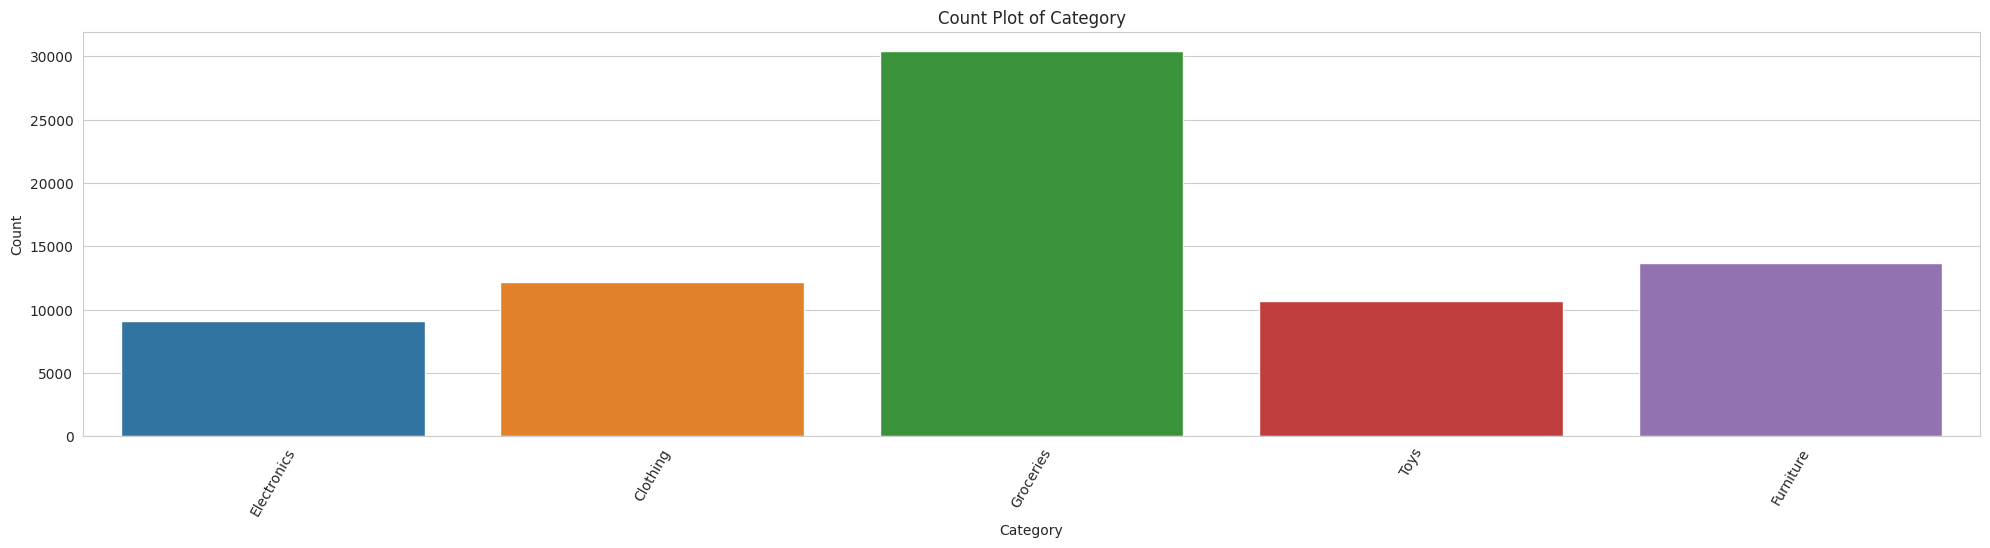

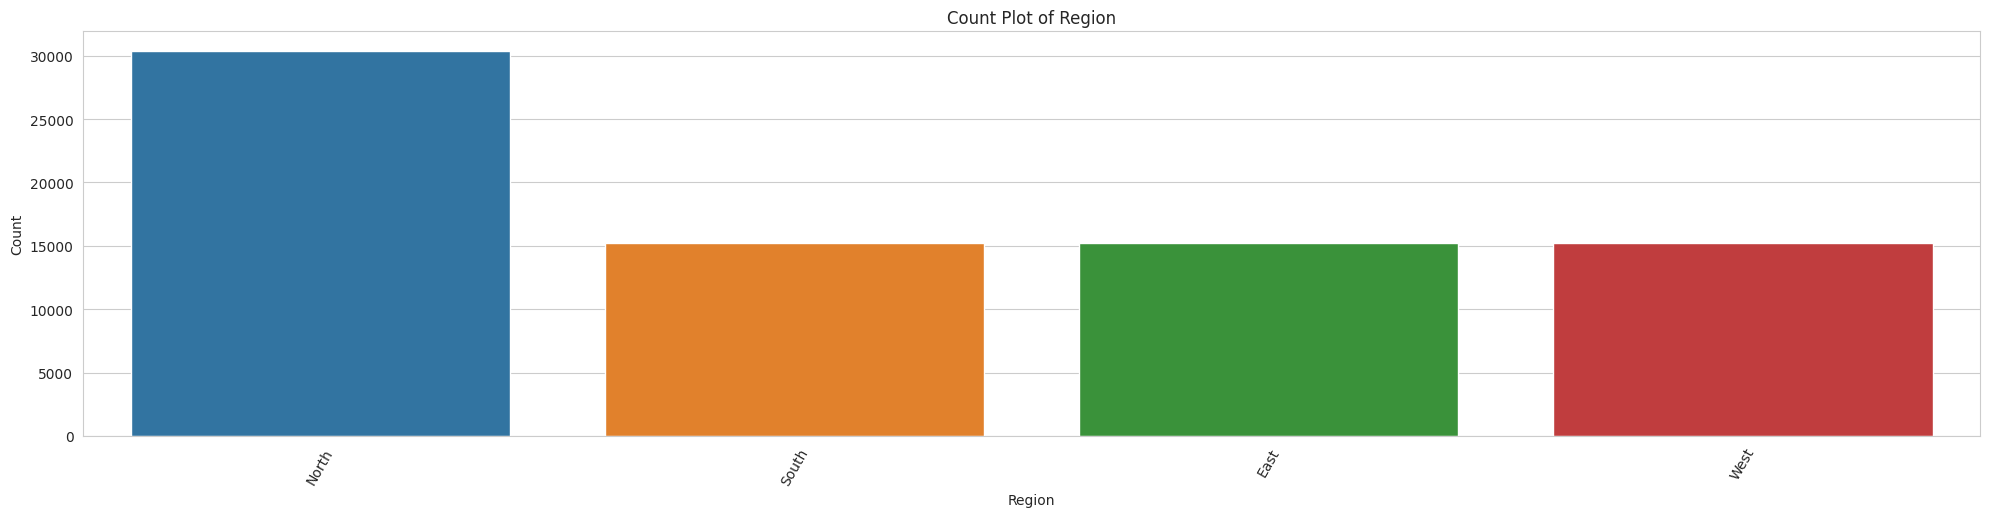

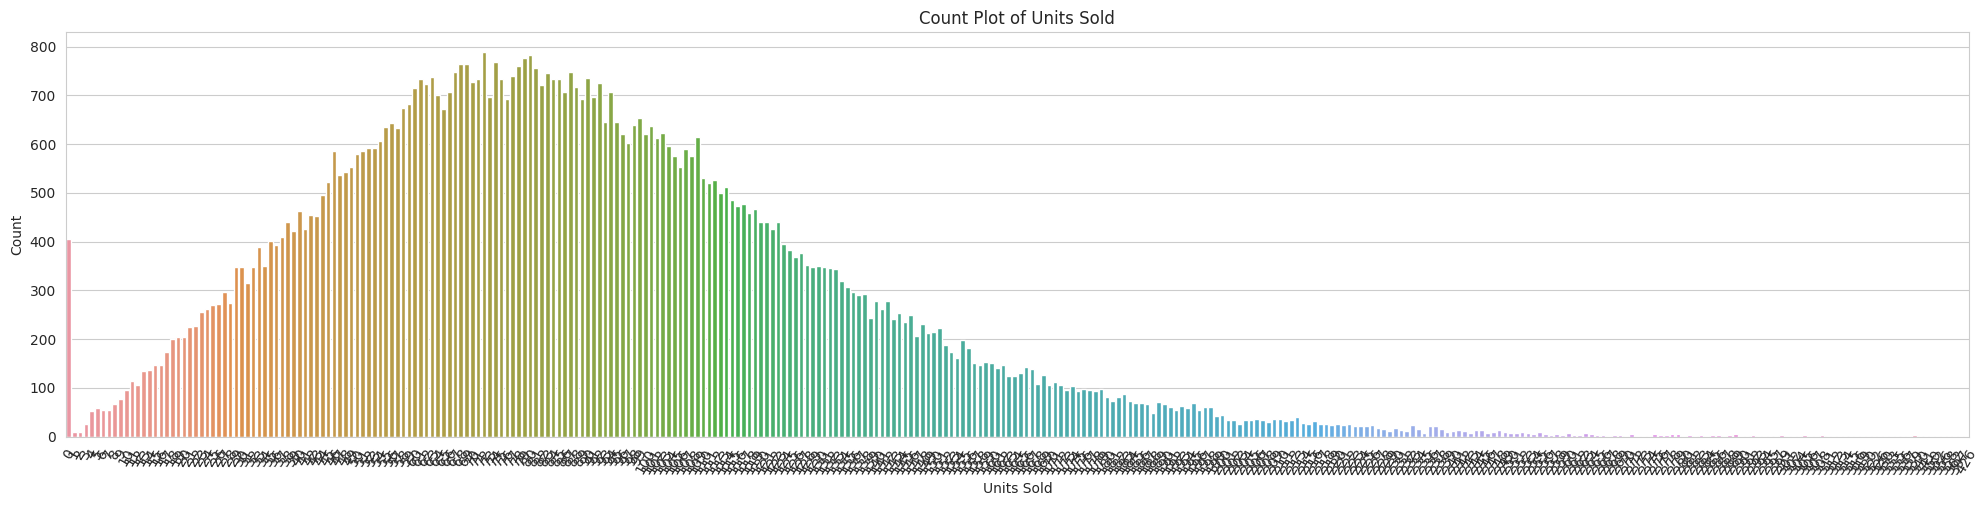

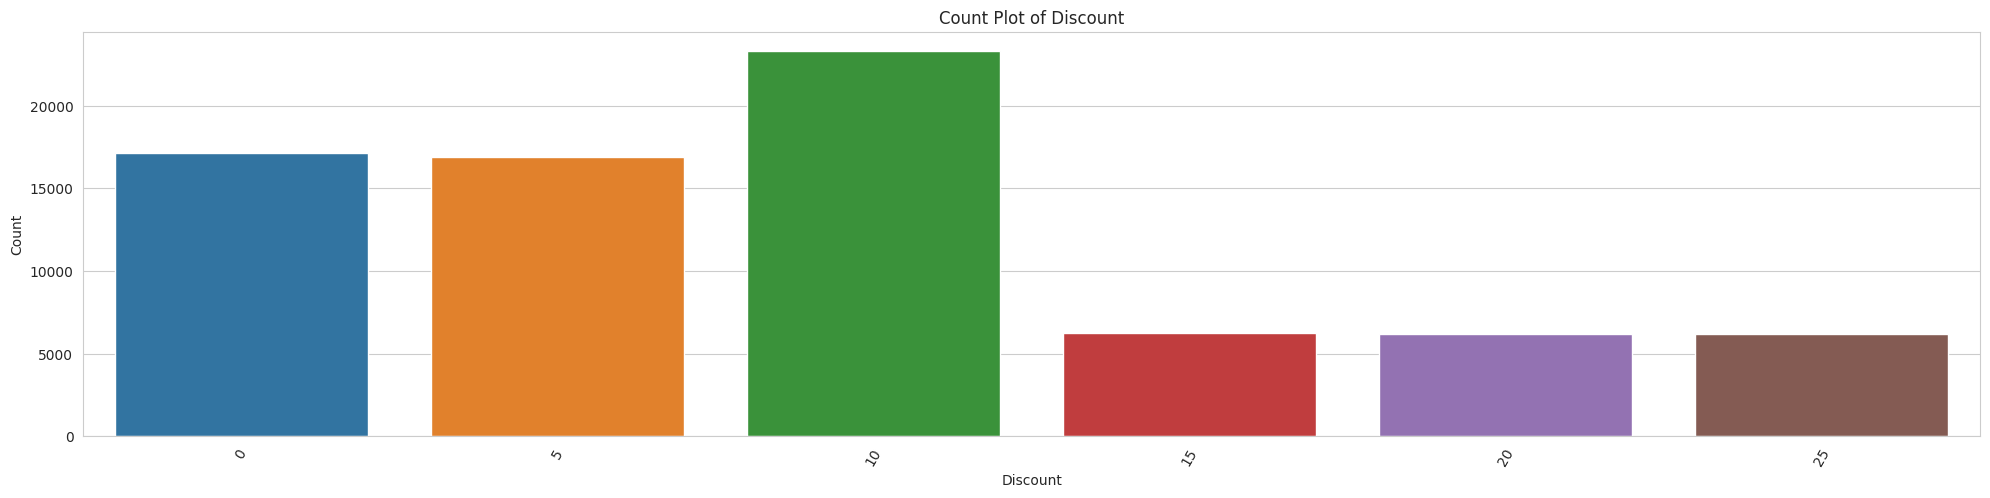

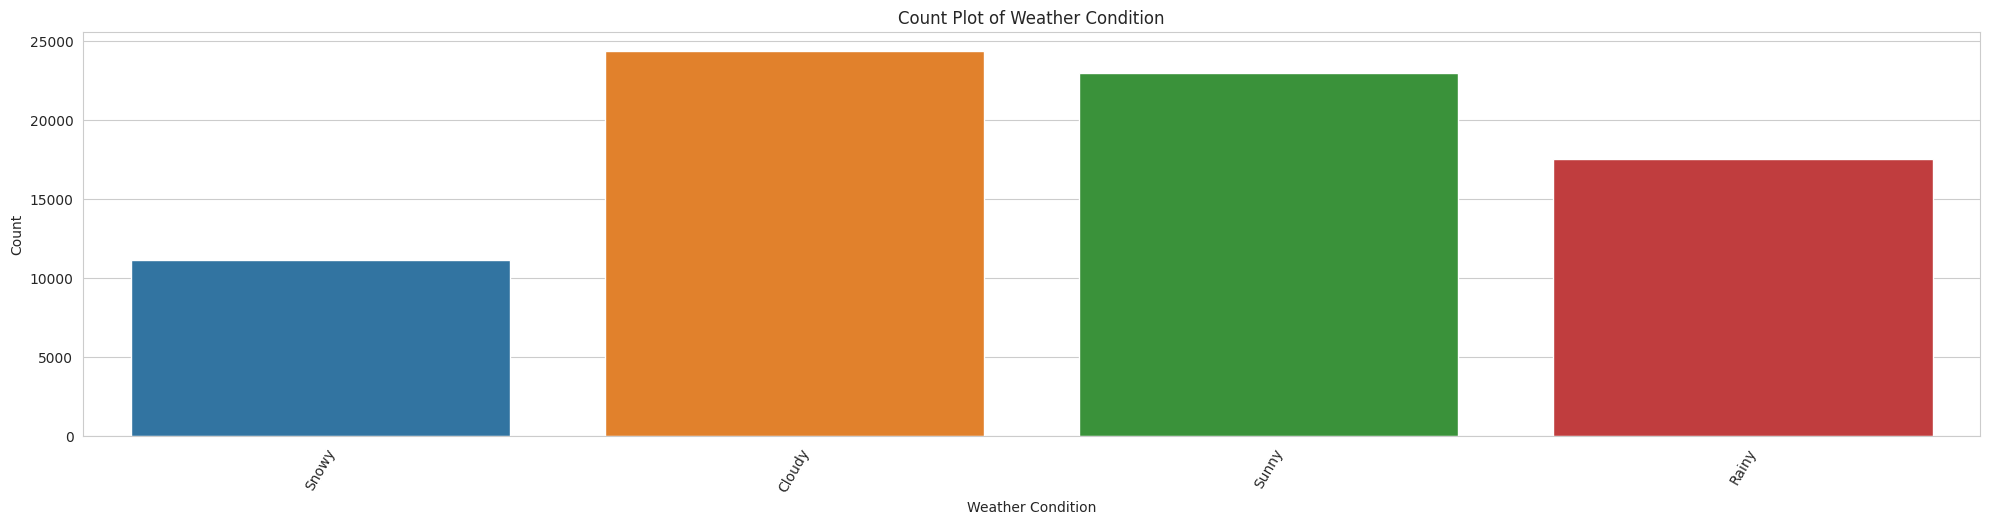

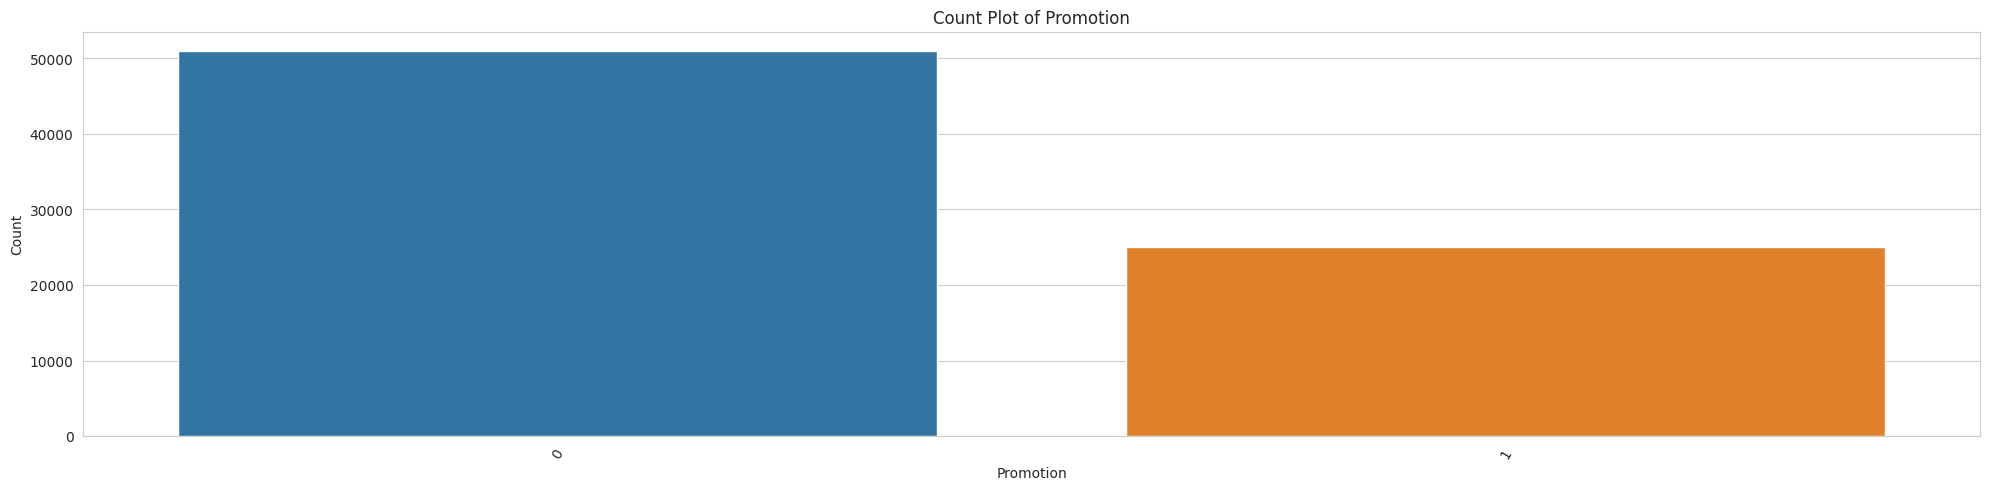

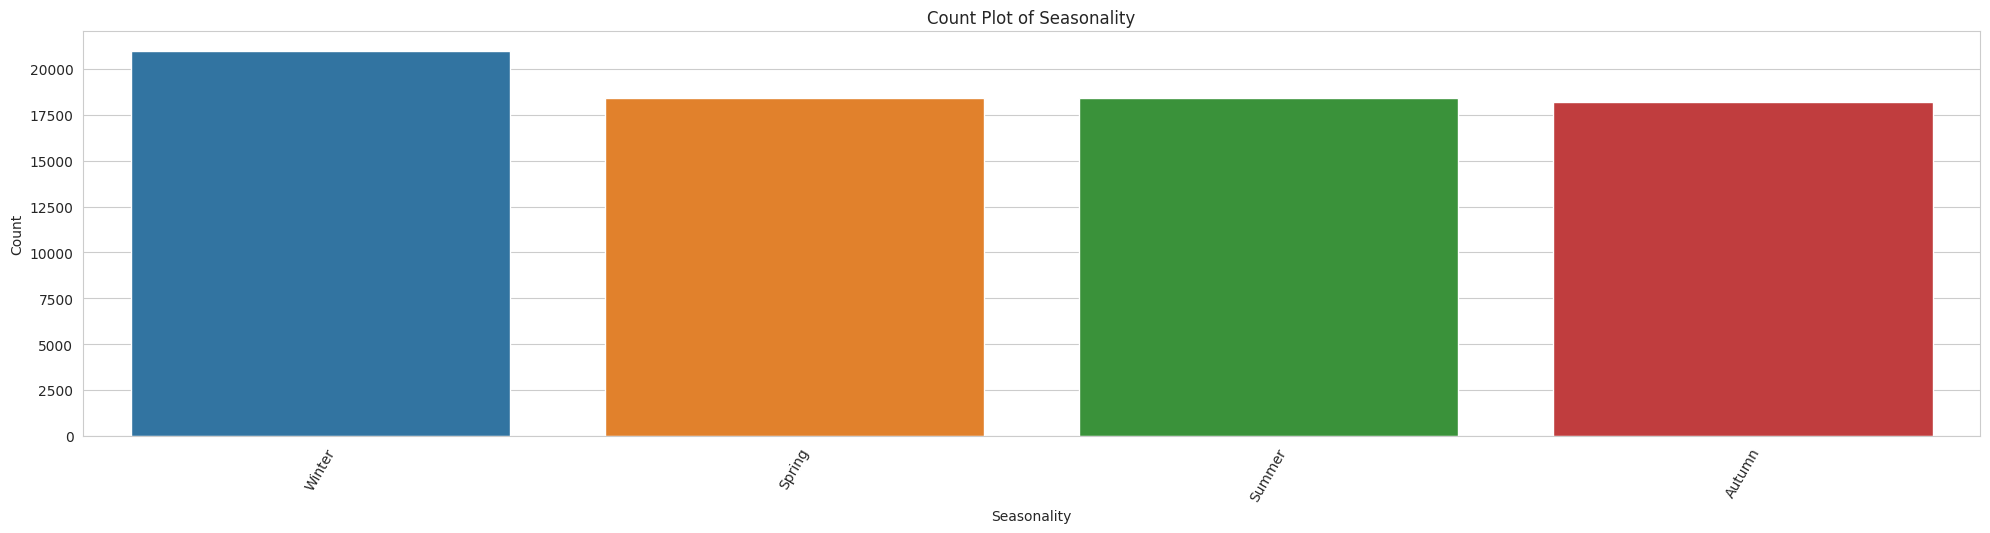

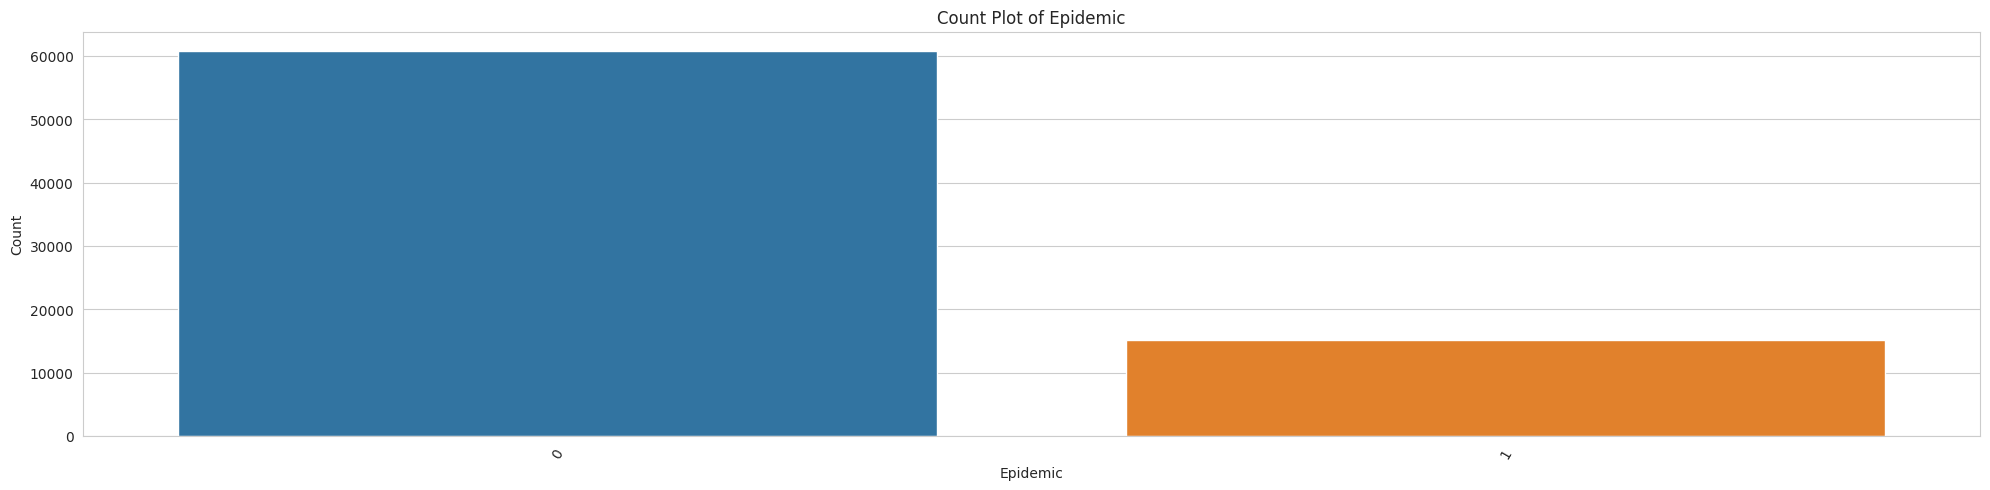

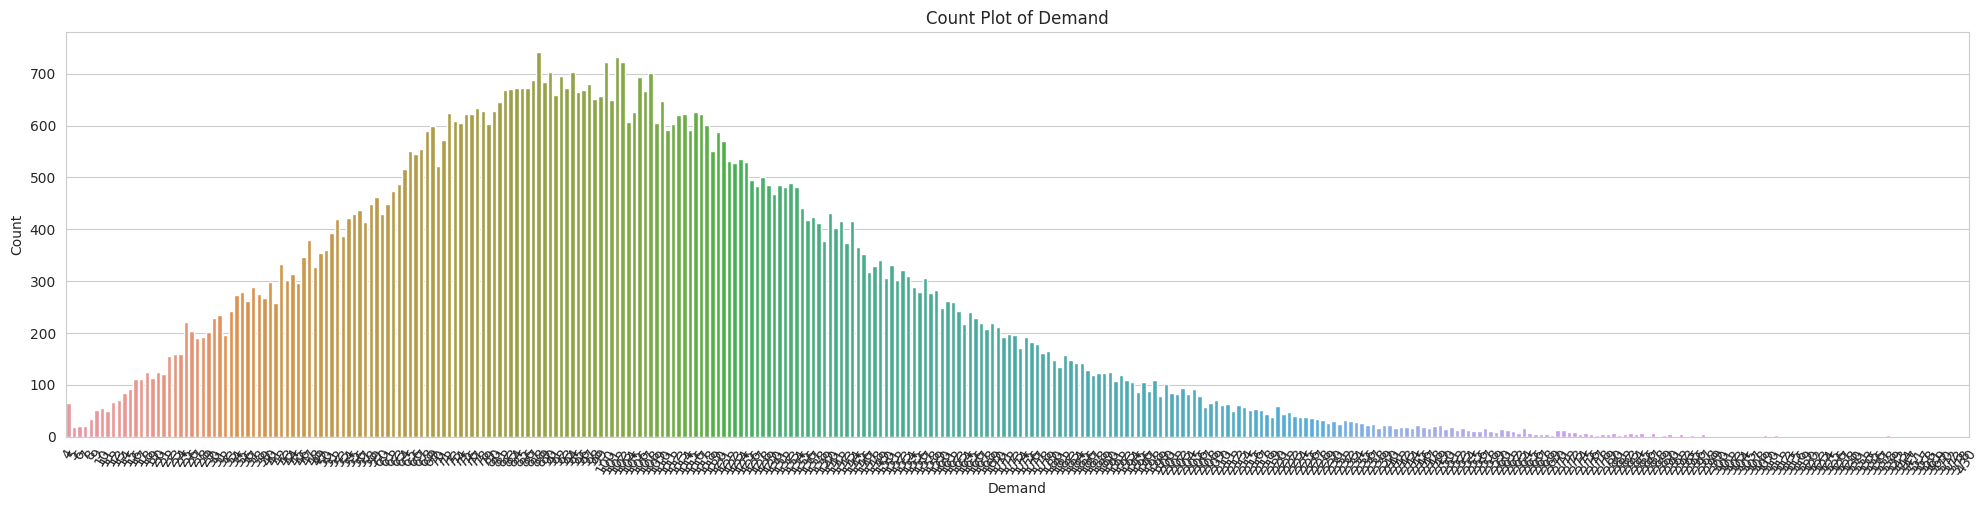

In [9]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count Plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.xticks(rotation =60)
        plt.show()

# KDE PLOT


>SOME PLOT ARE VERY STRANGE

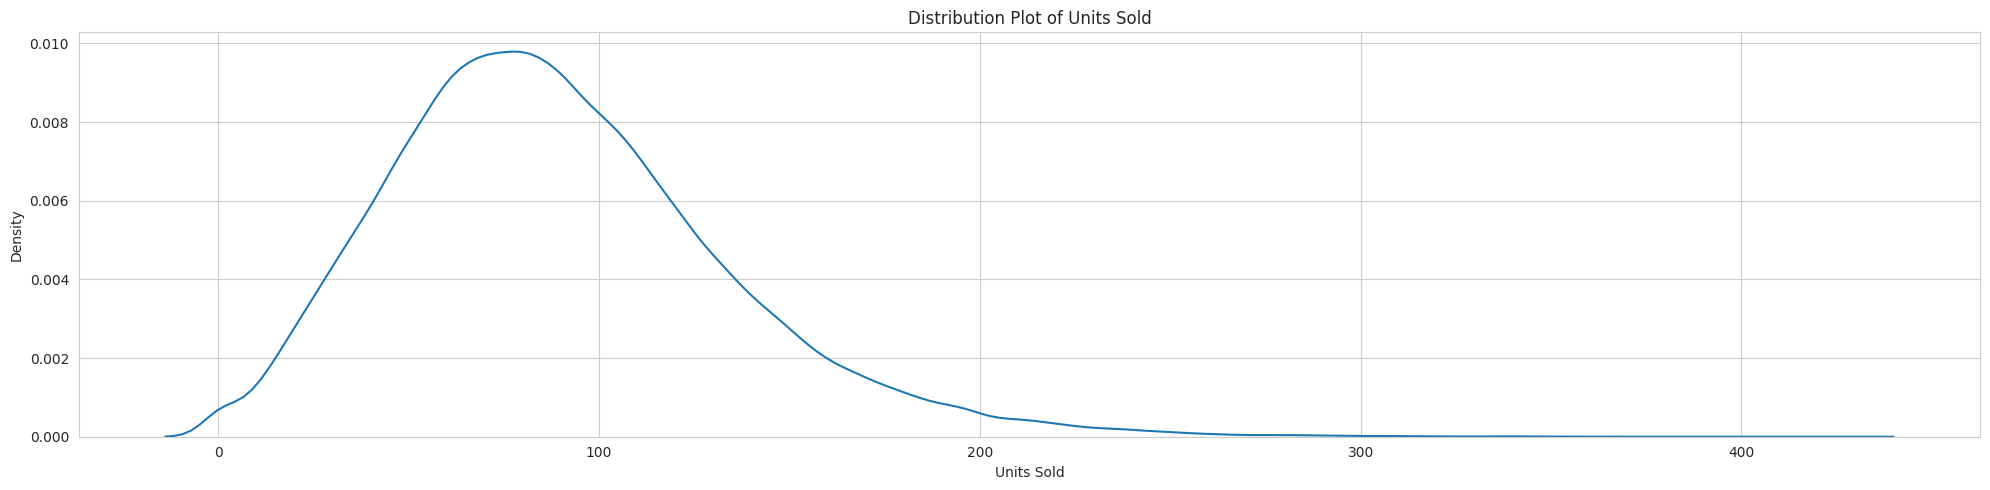

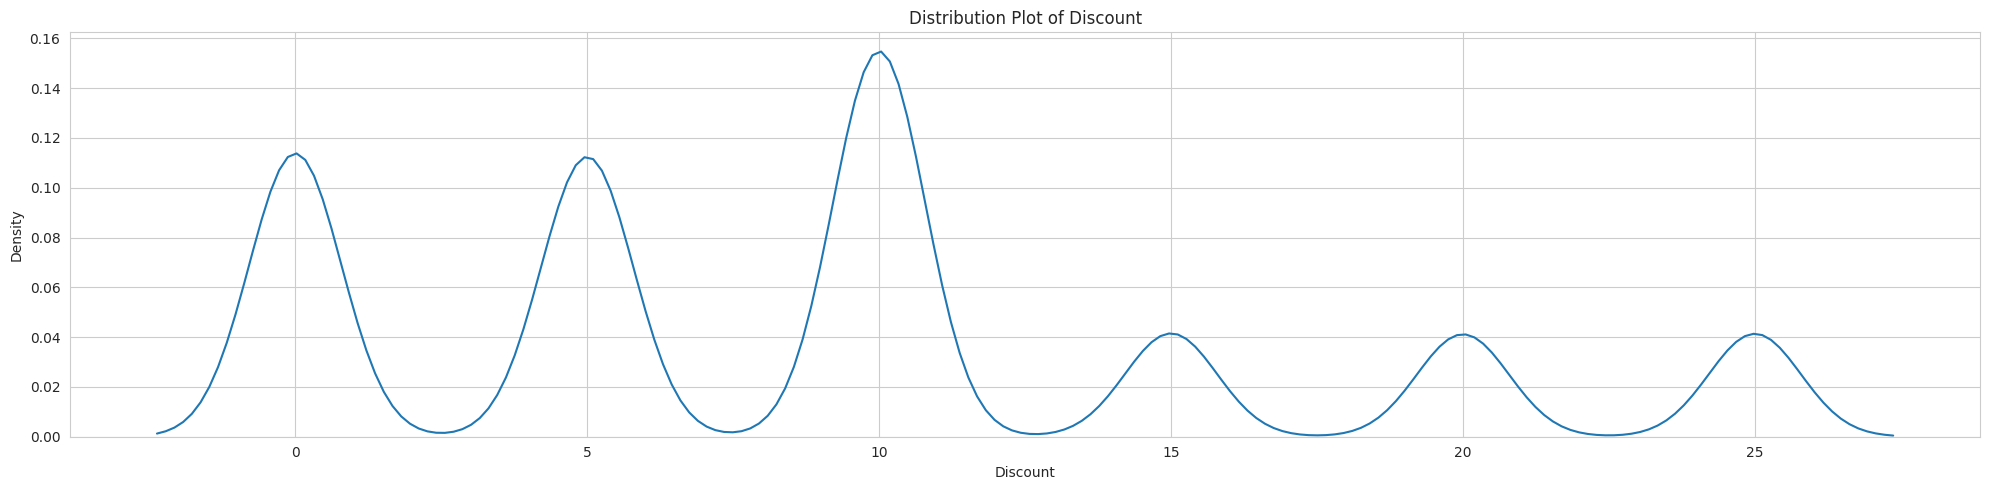

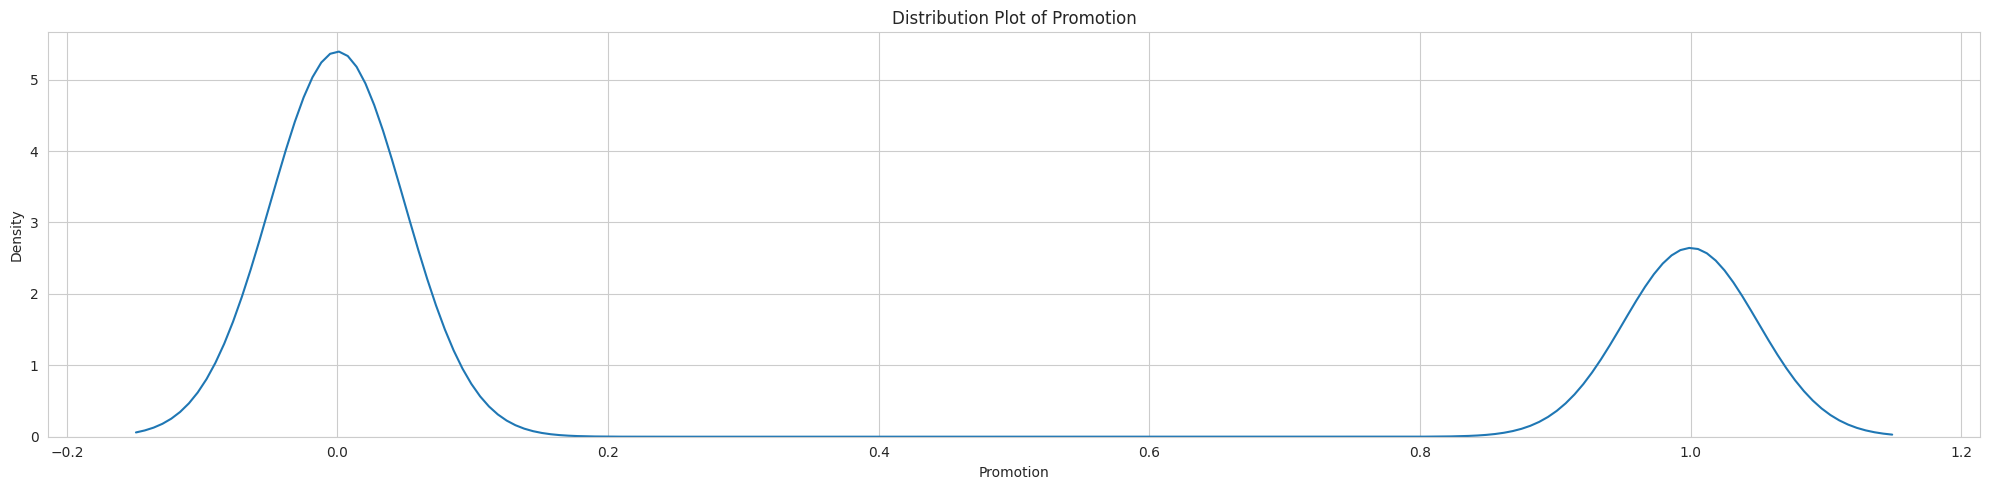

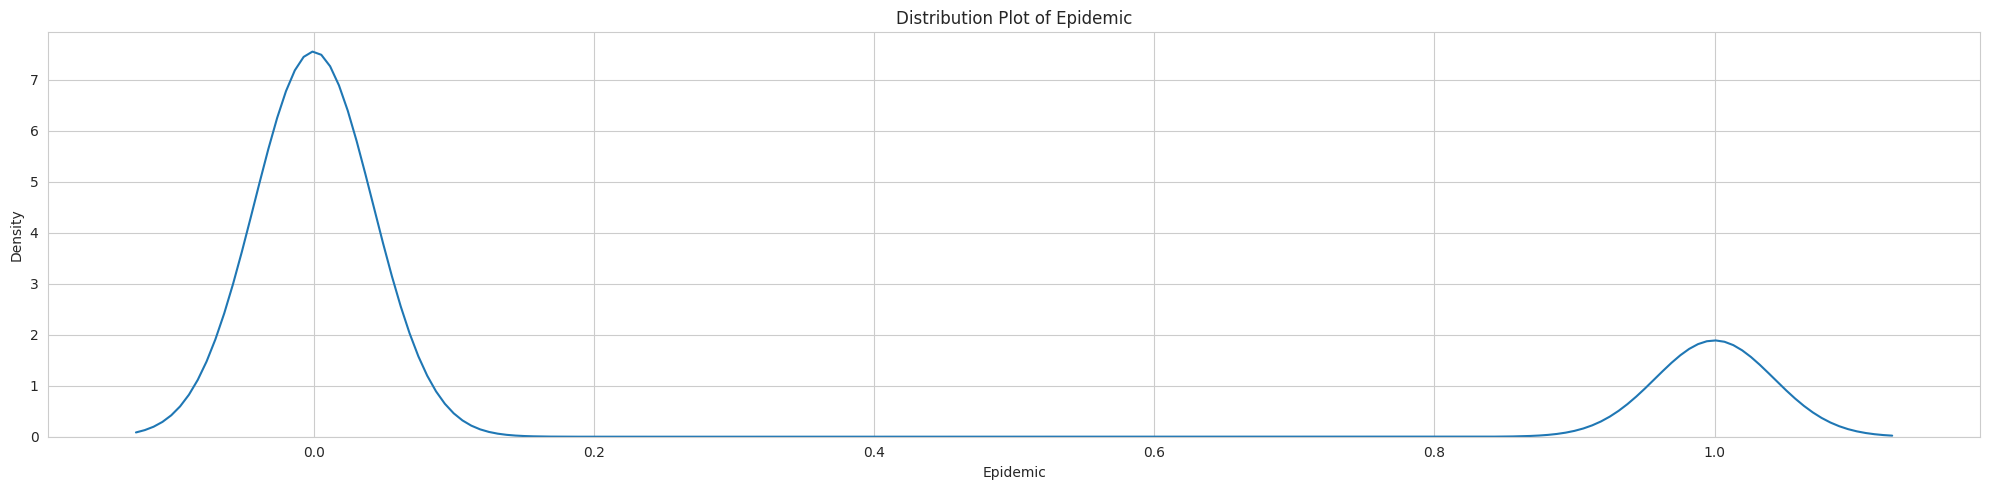

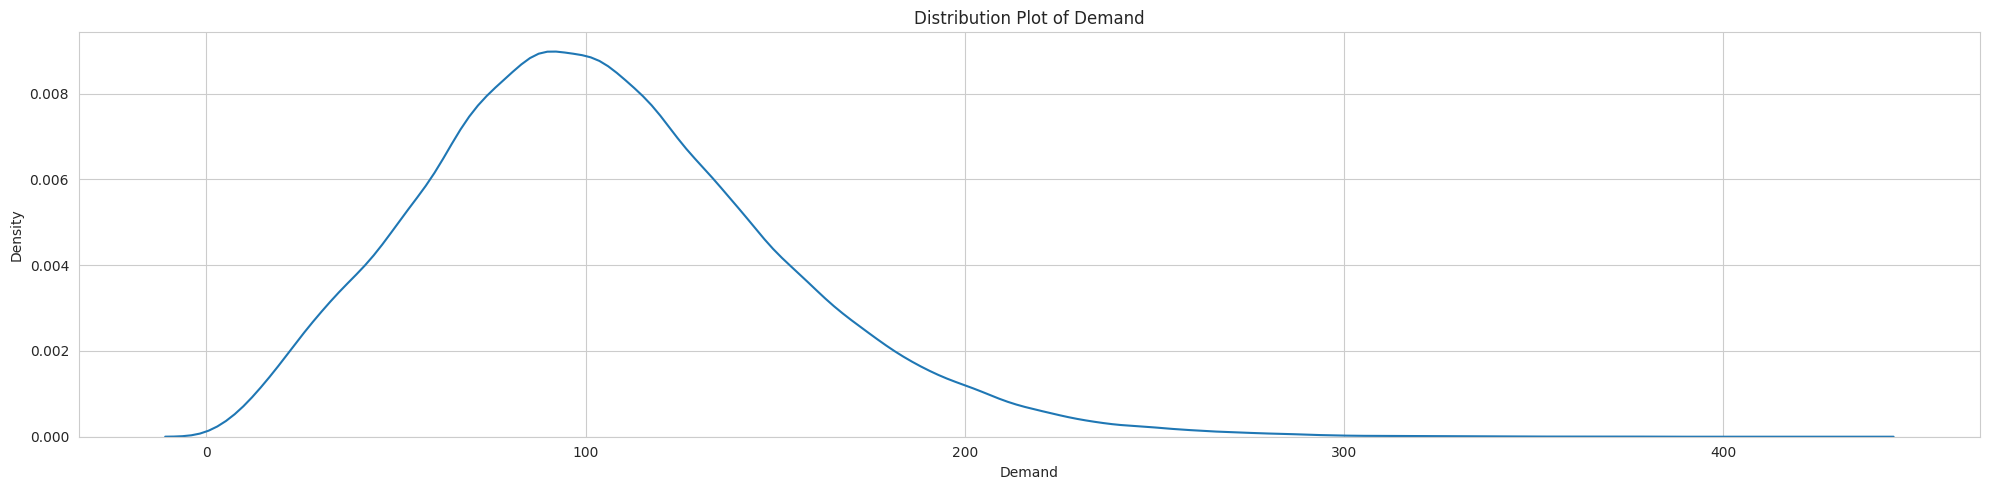

In [10]:
for feature in cols:
    if feature in df.columns and np.issubdtype(df[feature].dtype, np.number):
        plt.figure(figsize=(20, 5))
        sns.kdeplot(x=feature, data=df)
        plt.title(f'Distribution Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.tight_layout()
        plt.show()

In [11]:
line_col = ['Inventory Level', 'Units Ordered', 'Price','Competitor Pricing']

# LINE PLOT

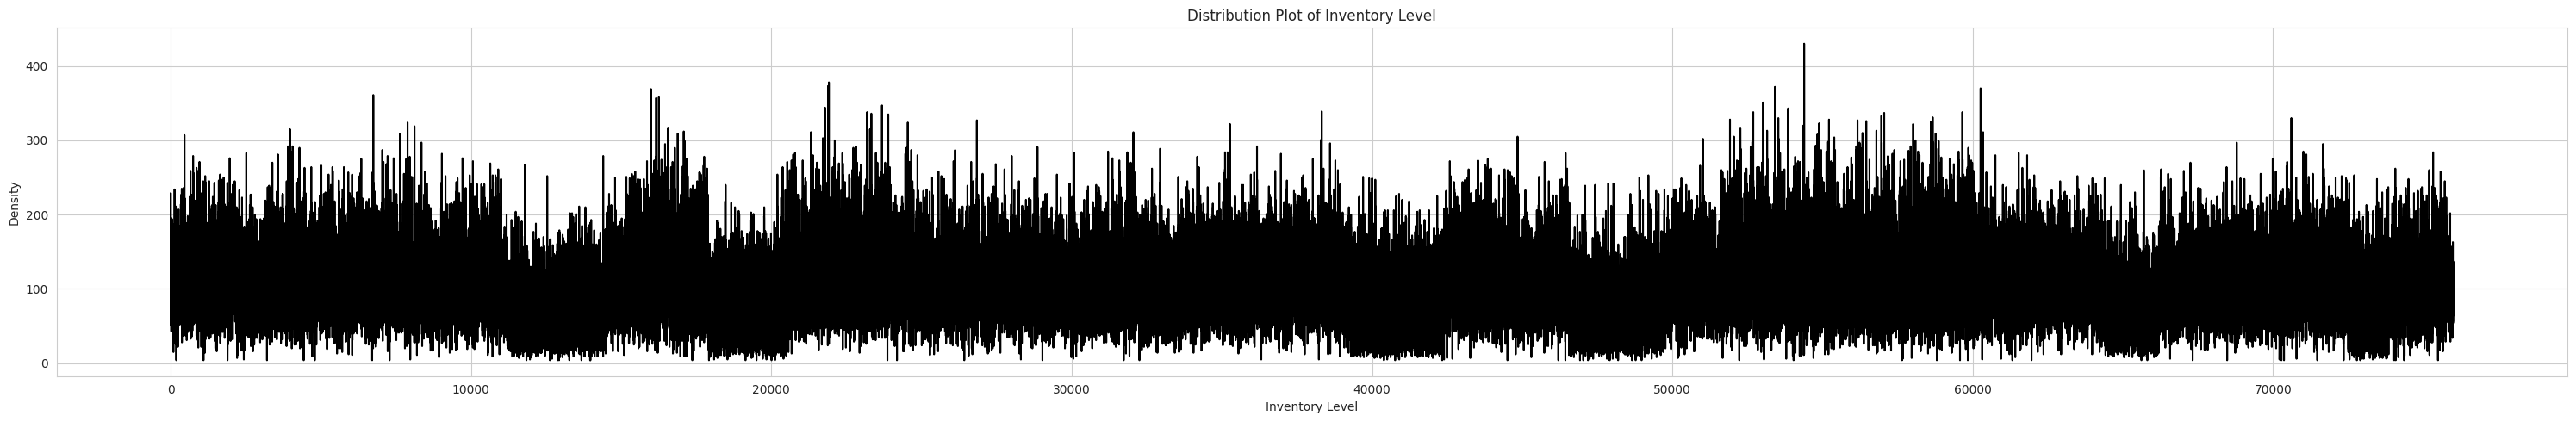

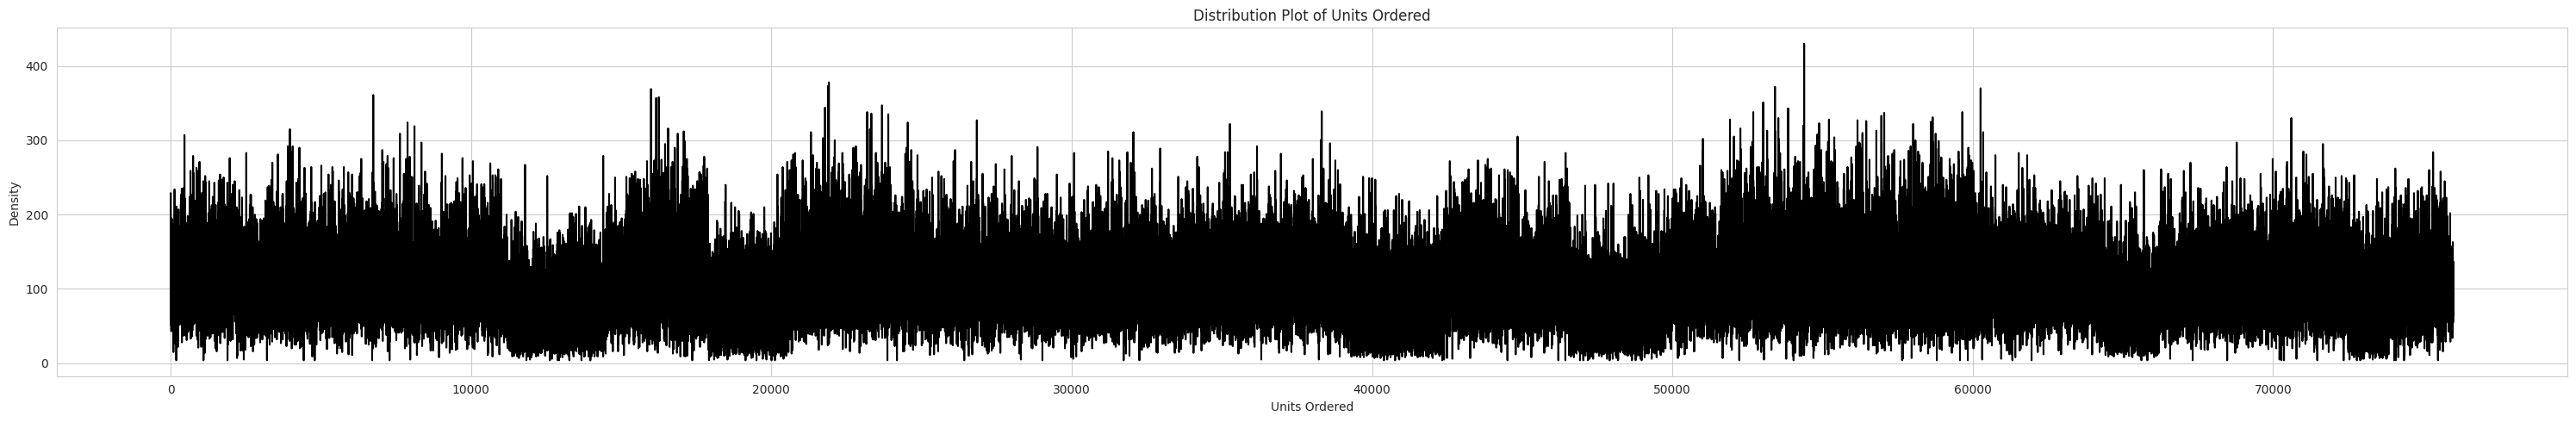

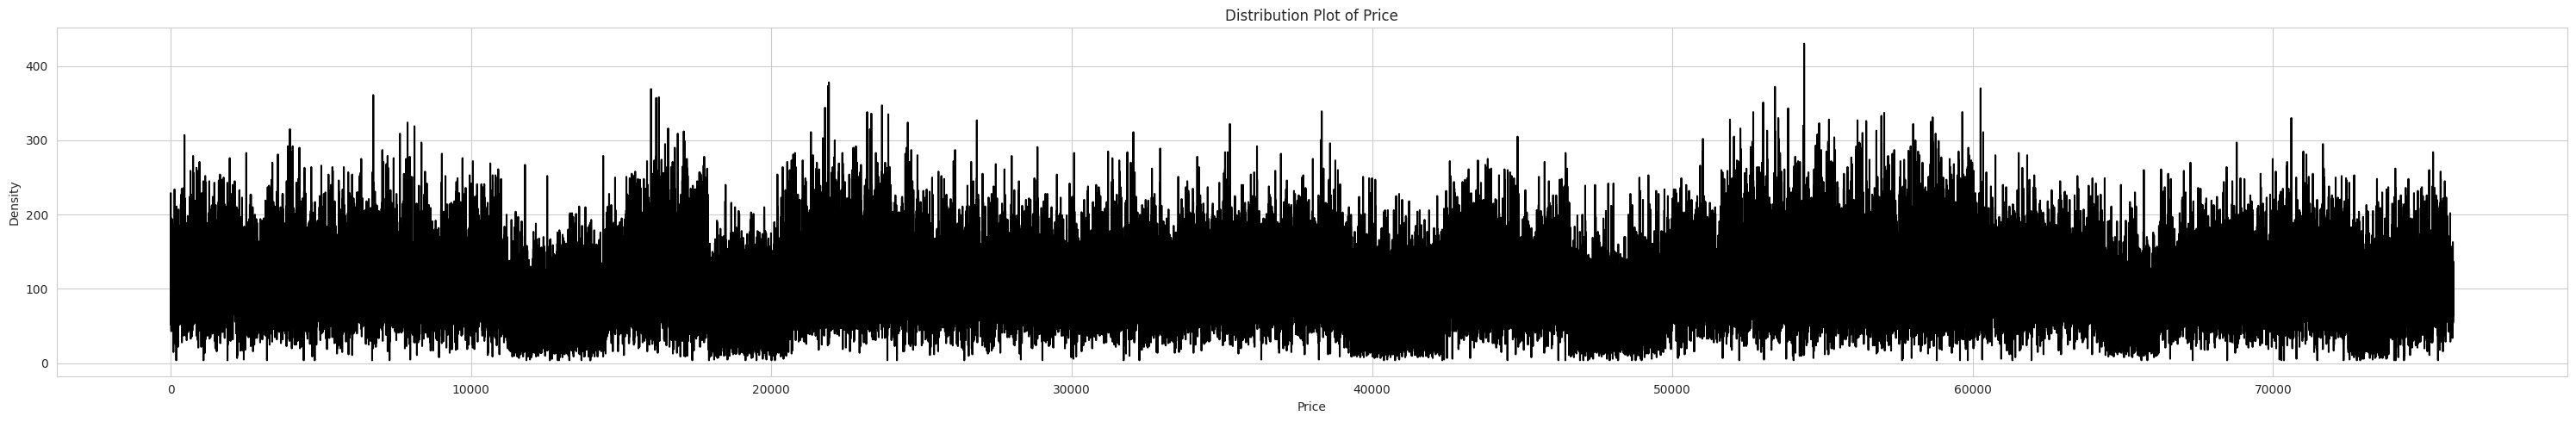

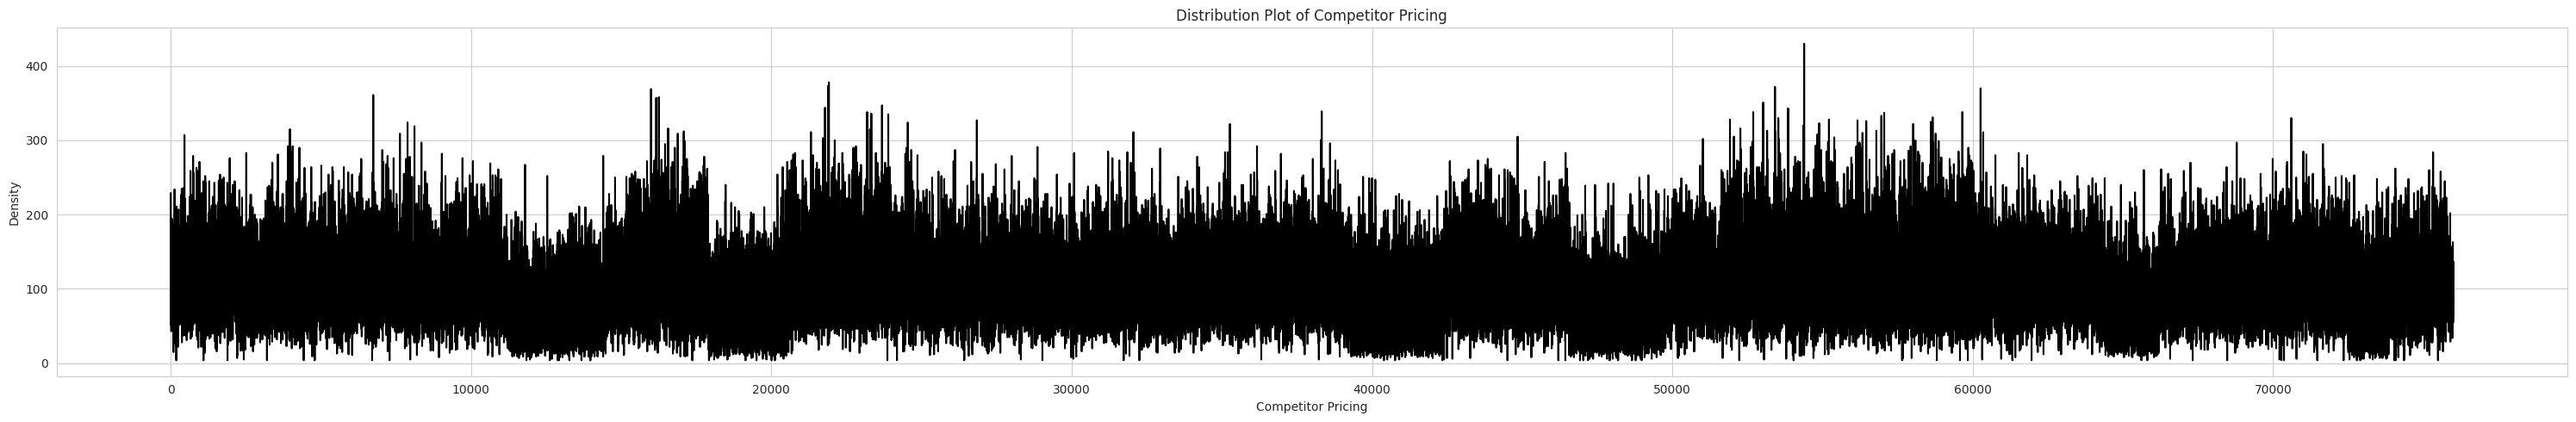

In [12]:
for feature in line_col:
    if feature in df.columns and np.issubdtype(df[feature].dtype, np.number):
        plt.figure(figsize=(30, 5))
        sns.lineplot(df[features].dropna(),color='black')
        plt.title(f'Distribution Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.tight_layout()
        plt.show()

# FEATURE ENGINEERING

In [13]:
lab_col = ['Category', 'Region',
       'Weather Condition','Seasonality']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
for column in lab_col:
    df[column] = le.fit_transform(df[column])

In [17]:
df = df.drop(columns=['Date','Store ID','Product ID'])

# CORRELATION MATRIX

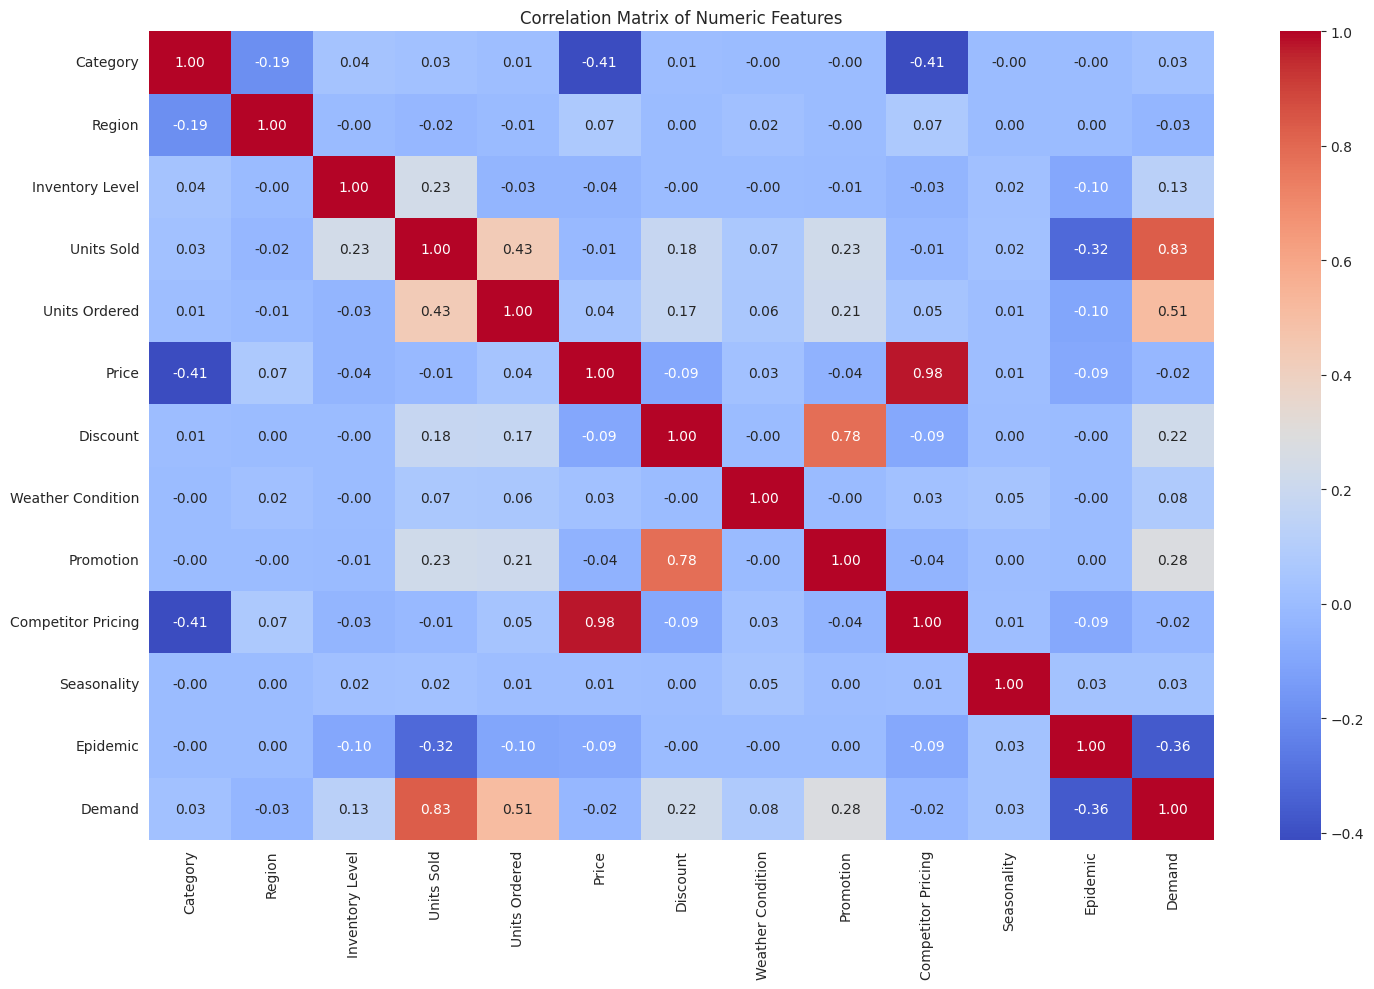

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[0]>=4:
    plt.figure(figsize=(15,10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# MODEL SECTION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import shap

2025-06-01 14:33:12.889455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748788393.195753      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748788393.286101      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
df['Promotion'].value_counts()

Promotion
0    51000
1    25000
Name: count, dtype: int64

In [21]:
X = df.drop(columns=['Demand'])
y = df['Demand']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Define model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


2025-06-01 14:33:39.328018: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [25]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict and evaluate
y_pred = model.predict(X_test_scaled).flatten()
print("R² Score:", r2_score(y_test, y_pred))

Epoch 1/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3115.1655 - mae: 37.6165 - val_loss: 550.9734 - val_mae: 17.7707
Epoch 2/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 475.9553 - mae: 16.5755 - val_loss: 455.0349 - val_mae: 16.1521
Epoch 3/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 413.4575 - mae: 15.3440 - val_loss: 425.2675 - val_mae: 15.8621
Epoch 4/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 378.0074 - mae: 14.7050 - val_loss: 389.5171 - val_mae: 14.9257
Epoch 5/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 354.2829 - mae: 14.3245 - val_loss: 377.1329 - val_mae: 14.3454
Epoch 6/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 341.0301 - mae: 13.9834 - val_loss: 356.1425 - val_mae: 14.1709
Epoch 7/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 328.1173 - mae: 13.6886 - val_loss: 351.9289 - val_mae: 13.8890
Epoch 8/10
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 315.4763 - mae: 13.4573 - val_loss: 347.2878 - val_mae:

In [26]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
print("Baseline R²:", model_lr.score(X_test_scaled, y_test))

Baseline R²: 0.7512026116984906


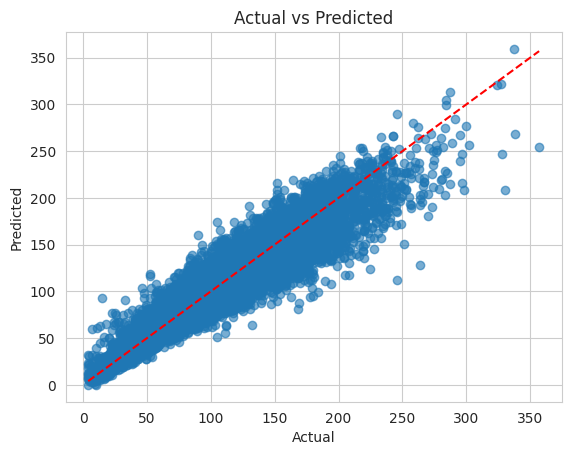

In [27]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.show()


PermutationExplainer explainer: 101it [00:20,  3.16it/s]


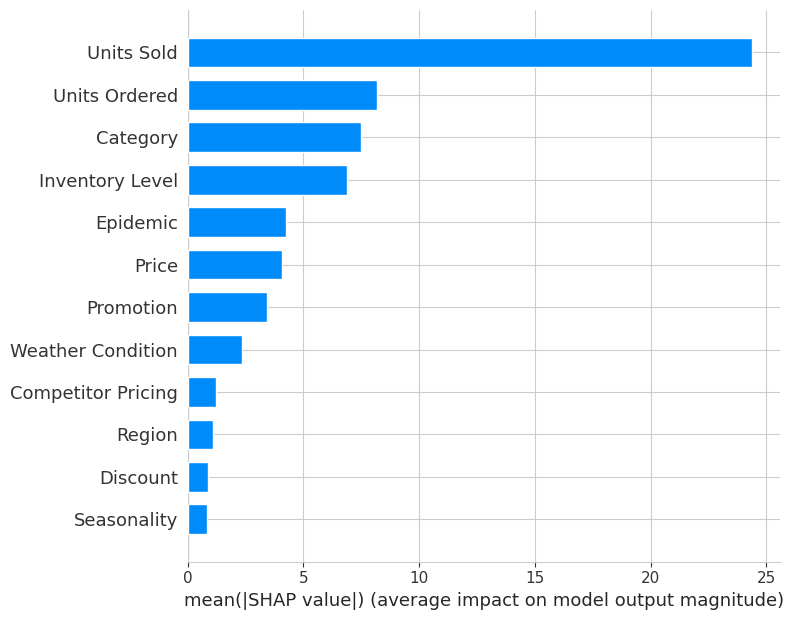

In [28]:
# Background + test samples (use small sample to keep SHAP fast)
background = X_train_scaled[:100]
test_sample = X_test_scaled[:100]

# Use the auto-detecting explainer (safe for Keras ANN)
explainer = shap.Explainer(model, background)
shap_values = explainer(test_sample)

# Plot top features
shap.summary_plot(
    shap_values.values,
    test_sample,
    feature_names=X.columns if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X_train_scaled.shape[1])],
    plot_type='bar'
)


In [29]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train_scaled, y_train)
print("Baseline R²:", model_dt.score(X_test_scaled, y_test))

Baseline R²: 0.7337568592109975


# Conclusion:

> Getting ~86% R2-Score by Using ANN

> Probably getting better results by using more HyperParameter-Tuening.